


TUGAS PEMROGRAMAN 2 SISTEM CERDAS
(FUZZY LOGIC)



---

I GUSTI AGUNG ISTRI SAVITRI MAHARANI (1303193085)

ELIZA FATRISIA (1303190039)

DITYA ILMI RIZQI (1303191119)

IT-43-03


In [ ]:
import csv
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
individu = []
pendapatan = []
hutang = []
fuzzypendapatan = []
fuzzyhutang = []

In [ ]:
Data = pd.read_excel('databaru.xlsx')

In [ ]:
for i in range(100):
    j = Data.at[i, 'ID']
    p = Data.at[i, 'Pendapatan']
    e = Data.at[i, 'Hutang']
    individu.append(j)
    pendapatan.append(p)
    hutang.append(e)

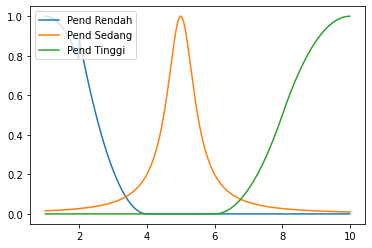

In [ ]:
a = 1
b = 2
c = 4

b2 = 5
c2 = 0.5

a3 = 6
b3 = 8
c3 = 10

#pendifinisan fungsi sigmoid dan beta
def Rendah(x):
    if (x <= a):
        return 1
    elif ((a < x) and (x <= b)):
        return 1-2*(((x-a)/(c-a))**2)
    elif ((b < x) and (x < c)):
        return (2*((c-x)/(c-a))**2)
    elif (x >= c):
        return 0
    
def Sedang(x):
      return 1/(1+abs((x-b2)/c2)**2)

def Tinggi(x):
    if (x <= a3):
        return 0
    elif ((a3 < x) and (x <= b3)):
        return 2*(((x-a3)/(c3-a3))**2)
    elif ((b3 < x) and (x < c3)):
        return 1-(2*((c3-x)/(c3-a3))**2)
    else:
        return 1 

x = np.arange(1, 10, 0.01)

y1 = []
y2 = []
y3 = []
for i in np.nditer(x):
    y1.append(Rendah(i))
    y2.append(Sedang(i))
    y3.append(Tinggi(i))

plt.plot(x, y1, label='Pend Rendah')
plt.plot(x, y2, label='Pend Sedang')
plt.plot(x, y3, label='Pend Tinggi')
plt.legend(loc='upper left')

#pengisian fuzzyset  indeks 1: Rendah, indeks 2: Sedang, Indeks 3: Tinggi
for i in pendapatan:
    temp1 = ["Rendah", (Rendah(float(i)))]
    temp2 = ["Sedang", (Sedang(float(i)))]
    temp3 = ["Tinggi", (Tinggi(float(i)))]
    fuzzypendapatan.append([temp1, temp2, temp3])


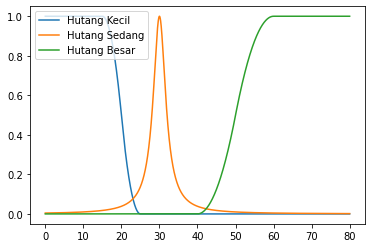

In [ ]:
a = 15.0
b = 20.0
c = 25.0

b2 = 30.0
c2 = 2.

a3 = 40.0
b3 = 50.0
c3 = 60.0  

#visualisasi data fuzzyset untuk Hutang

#pendifinisan fungsi sigmoid dan beta
def Kecil(x):
    if (x <= a):
        return 1
    elif ((a < x) and (x <= b)):
        return 1-2*(((x-a)/(c-a))**2)
    elif ((b < x) and (x < c)):
        return (2*((c-x)/(c-a))**2)
    elif (x >= c):
        return 0
    
def Sedang(x):
      return 1/(1+abs((x-b2)/c2)**2)

def Besar(x):
    if (x <= a3):
        return 0
    elif ((a3 < x) and (x <= b3)):
        return 2*(((x-a3)/(c3-a3))**2)
    elif ((b3 < x) and (x < c3)):
        return 1-(2*((c3-x)/(c3-a3))**2)
    else:
        return 1 

x = np.arange(0, 80, 0.01)

y1 = []
y2 = []
y3 = []
for i in np.nditer(x):
    y1.append(Kecil(i))
    y2.append(Sedang(i))
    y3.append(Besar(i))

plt.plot(x, y1, label='Hutang Kecil')
plt.plot(x, y2, label='Hutang Sedang')
plt.plot(x, y3, label='Hutang Besar')
plt.legend(loc='upper left')

#pengisian fuzzyset  indeks 1: Kecil, indeks 2: Sedang, Indeks 3: Besar
for i in hutang:
    temp1 = ["Kecil", (Kecil(float(i)))]
    temp2 = ["Sedang", (Sedang(float(i)))]
    temp3 = ["Besar", (Besar(float(i)))]
    fuzzyhutang.append([temp1, temp2, temp3])


In [ ]:
Fuzzification = []
DFuzzy = [] #Penampungan data hasil Disjungsi
CFuzzy = [] #penampungan data hasil conjungsi
    
#fuzzy rule
def FuzzyRule (a) :
    if ((a[0][0] == "Rendah") and (a[1][0] == "Kecil") and (a[0][1] < a[1][1])):
        return ["True",a[0][1]]
    if ((a[0][0] == "Rendah") and (a[1][0] == "Sedang") and (a[0][1] < a[1][1])):
        return ["False",a[0][1]]
    if ((a[0][0] == "Rendah") and (a[1][0] == "Besar") and (a[0][1] < a[1][1])):
        return ["False",a[0][1]]
    if ((a[0][0] == "Sedang") and (a[1][0] == "Kecil") and (a[0][1] < a[1][1])):
        return ["True",a[0][1]]
    if ((a[0][0] == "Sedang") and (a[1][0] == "Sedang") and (a[0][1] < a[1][1])):
        return ["True",a[0][1]]
    if ((a[0][0] == "Sedang") and (a[1][0] == "Besar") and (a[0][1] < a[1][1])):
        return ["False",a[0][1]]
    if ((a[0][0] == "Tinggi") and (a[1][0] == "Kecil") and (a[0][1] < a[1][1])):
        return ["True",a[0][1]]
    if ((a[0][0] == "Tinggi") and (a[1][0] == "Sedang") and (a[0][1] < a[1][1])):
        return ["True",a[0][1]]
    if ((a[0][0] == "Tinggi") and (a[1][0] == "Besar") and (a[0][1] < a[1][1])):
        return ["True",a[0][1]]
    
    if ((a[0][0] == "Rendah") and (a[1][0] == "Kecil") and (a[0][1] >= a[1][1])):
        return ["True",a[1][1]]
    if ((a[0][0] == "Rendah") and (a[1][0] == "Sedang") and (a[0][1] >= a[1][1])):
        return ["False",a[1][1]]
    if ((a[0][0] == "Rendah") and (a[1][0] == "Besar") and (a[0][1] >= a[1][1])):
        return ["False",a[1][1]]
    if ((a[0][0] == "Sedang") and (a[1][0] == "Kecil") and (a[0][1] >= a[1][1])):
        return ["True",a[1][1]]
    if ((a[0][0] == "Sedang") and (a[1][0] == "Sedang") and (a[0][1] >= a[1][1])):
        return ["True",a[1][1]]
    if ((a[0][0] == "Sedang") and (a[1][0] == "Besar") and (a[0][1] >= a[1][1])):
        return ["False",a[1][1]]
    if ((a[0][0] == "Tinggi") and (a[1][0] == "Kecil") and (a[0][1] >= a[1][1])):
        return ["True",a[1][1]]
    if ((a[0][0] == "Tinggi") and (a[1][0] == "Sedang") and (a[0][1] >= a[1][1])):
        return ["True",a[1][1]]
    if ((a[0][0] == "Tinggi") and (a[1][0] == "Besar") and (a[0][1] >= a[1][1])):
        return ["True",a[1][1]]

def disjunct(a,b):
    temp = ["Ya", 0]
    temp2 = ["Tidak", 0]
    for i in range(len(a)):
        if ((a[i][0]) == "False"):
            if ((a[i][1]) > temp2[1]):
                temp2 = ["Tidak", a[i][1]]
        elif ((a[i][0] == "True")):
            if ((a[i][1]) > temp[1]):
                temp = ["Ya", a[i][1]]
    return [b+1,temp,temp2]
  

In [ ]:
temp = []
for i in range(len(DataKepalaKeluarga)):
    for j in range(len(FuzzysetHutang[i])):
        for k in range(len(FuzzysetPendapatan[j])):
            temp = [FuzzysetPendapatan[i][j],FuzzysetHutang[j][k]]
            Fuzzification.append(temp)

#Penampungan data Konjungsi
count = 0
temp = []
for i in range(len(Fuzzification)):    
    if (count < 8):
        count += 1
        temp.append(FuzzyRule(Fuzzification[i]))
    else:
        CFuzzy.append(temp)
        count = 0
        temp = []
        
#Penampungan data Disjungsi (Final Defuzzification)
for i in range(len(CFuzzy)):
    DFuzzy.append(disjunct(CFuzzy[i],i))

In [ ]:
DFuzzy

[[1, ['Ya', 0.0030861919619424704], ['Tidak', 0.28741256587136443]],
 [2, ['Ya', 0.0030861919619424704], ['Tidak', 0.48793738267562053]],
 [3, ['Ya', 0.057652968185541824], ['Tidak', 0.09888692125150172]],
 [4, ['Ya', 0.3666988776776089], ['Tidak', 0.06763756953498345]],
 [5, ['Ya', 0.3054502653760941], ['Tidak', 0.05030859314844114]],
 [6, ['Ya', 0.0030861919619424704], ['Tidak', 0.5150302923002626]],
 [7, ['Ya', 0.0030861919619424704], ['Tidak', 0.2059403135327351]],
 [8, ['Ya', 0.6652378509362815], ['Tidak', 0.03245085280903685]],
 [9, ['Ya', 0.7713889928629475], ['Tidak', 0.04424676655303055]],
 [10, ['Ya', 0.962849568555789], ['Tidak', 0.03251478537928444]],
 [11, ['Ya', 1], ['Tidak', 0.014983847651410186]],
 [12, ['Ya', 0.6074233829332109], ['Tidak', 0.05298158235984372]],
 [13, ['Ya', 0.0030861919619424704], ['Tidak', 0.26895118280224944]],
 [14, ['Ya', 0.9964916352741586], ['Tidak', 0.02855699927147197]],
 [15, ['Ya', 0.010547420890293596], ['Tidak', 0.1600946623201344]],
 [16,

In [ ]:
Tidak = 100
Ya = 1

def Sugeno(a,b):
    return (a*Tidak + b*Ya)/(a+b)

In [ ]:
DeFuzzification = []
for i in range(len(DFuzzy)):
    a = DFuzzy[i][1][1]
    b = DFuzzy[i][2][1]
    DeFuzzification.append([i+1,Sugeno(a,b)])
    
#sort hasil fuzzy untuk memilih 20 hasil terbaik
DeFuzzification = sorted(DeFuzzification, key=lambda kk: kk[1], reverse = True)

#Save data teratas ke file csv, hasil 20 teratas merupakan keluarga yang mendapatkan tunjangan
#Format Data (x,y) x merupakan no urut kepala keluarga, dengan y sebagai nilai kelayakan
with open('PermohonanKartuKredit_ACC.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(["ID","Nilai Kelayakan"])
    for i in range(20):
        spamwriter.writerow(DeFuzzification[i])

In [ ]:
DeFuzzification

[[82, 98.9192938418174],
 [94, 98.91676632487604],
 [65, 98.89100153901038],
 [64, 98.86404781184514],
 [63, 98.83100734752304],
 [37, 98.82010599514243],
 [30, 98.76146395177672],
 [25, 98.74551025683284],
 [78, 98.72410728657053],
 [67, 98.5882976287182],
 [11, 98.5384980057347],
 [83, 98.52595325936369],
 [90, 98.48053166864675],
 [29, 98.47460019919525],
 [21, 98.46662885551355],
 [48, 98.41330750271506],
 [42, 98.41270080575939],
 [87, 98.35881381593111],
 [46, 98.33223438192618],
 [66, 98.21440876852388],
 [23, 98.19092735094732],
 [31, 98.1829819214026],
 [38, 98.00809231692436],
 [40, 98.00729016511326],
 [72, 97.98895502791268],
 [62, 97.86702264291222],
 [93, 97.69565404908104],
 [88, 97.69086930954327],
 [28, 97.59338267943832],
 [73, 97.53387535047197],
 [77, 97.40514201962814],
 [14, 97.24194264291772],
 [76, 97.01621692386534],
 [91, 96.97806784447894],
 [50, 96.96539574274331],
 [56, 96.91644923797143],
 [59, 96.77472948250504],
 [10, 96.7660447756409],
 [39, 96.72748384